<a href="https://colab.research.google.com/github/HiImGabry/speech-recognition-representation-unica-dl/blob/issue-2/Analisi_Esplorativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Analisi Dataset*

📊Come primo step fondamentale del nostro progetto, effettueremo un'analisi generale sull'intero Training Set che abbiamo a disposizione.
Per semplicità il nostro Training Set è stato ***ridotto*** dell'80%, quindi tutte le computazioni che vedremo nelle successive celle e lungo tutto il progetto sono adattate ad un Dataset ridotto rispetto a quello originale.


Nella successiva cella, andiamo ad importare le librerie che saranno utili proprio per l'analisi descritta nella cella di testo precedente.

In [25]:
#importo le librerie necessarie
import tensorflow as tf #tensorflow viene importata per trattare array di tensori
import pathlib #pathlib viene importata per poterci muovere tra i vari percorsi del nostro Training Set
import os #os viene importata per poterci permettere di scrivere linee di comando come in Linux
import pandas as pd #pandas come sappiamo è uno strumento fondamentale per l'analisi di dati
import numpy as np #numpy viene inserita tra le librerie perché la utilizziamo per convertire tensori in numpy_array
import matplotlib.pyplot as plt #libreria grafica per darci la possibilità di visualizzare grafici
import IPython.display as IPD #IPython.display è una libreria particolare che utilizziamo la prima volta, per questo motivo, approfondiamo il suo funzionamento nella cella di testo seguente


### IPython.display
IPython.display è una libreria che ha molteplici utilizzi, tra cui, permette una visualizzazione ordinata e funzionale di audio tramite un mini-player.
Vedremo sotto, come la libreria è stata utilizzata per ascoltare uno degli 'audio.wav' presenti nel Set di Addestramento.


In [2]:
#queste righe di codice mostrano come grazie alla libreria os, possiamo utilizzare una cella di codice esattamente come se fosse un terminale
!wget --no-check-certificate 'https://cdn.discordapp.com/attachments/1209871752134529066/1248571032449581116/reduced_dataset.zip?ex=666425e3&is=6662d463&hm=5d7859ac5d2e3fb59155f8e7d4e8bfb61e4d0ef173f878ddc42f53dd38c8d2cb&' -O ../reduced_dataset.zip
!unzip ../reduced_dataset.zip
!mv reduced_dataset ..

Streaming output truncated to the last 5000 lines.
  inflating: reduced_dataset/train/audio/right/ad6a46f1_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/adec6a94_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/afe0b87d_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/afe0b87d_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/aff582a1_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b06c19b0_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b0bad4a9_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b0c0197e_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b15fc37d_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b19f7f5f_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b43de700_nohash_0.wav  
  inflating: reduced_dataset/train/audio/right/b4604db4_nohash_1.wav  
  inflating: reduced_dataset/train/audio/right/b49caed3_nohash_0.wav  
  inflating: reduced_datas

In [4]:
#con la seguente linea di codice, andiamo a visualizzare il contenuto di una cartella del nostro dataset
!ls ../reduced_dataset/train/audio/wow

00f0204f_nohash_0.wav  3fb8c268_nohash_0.wav  815f0f03_nohash_1.wav  c0f8f4df_nohash_1.wav
0135f3f2_nohash_1.wav  40115b19_nohash_0.wav  81a345a3_nohash_1.wav  c0f8f4df_nohash_2.wav
014f9f65_nohash_0.wav  41dce6f5_nohash_1.wav  82e7204d_nohash_0.wav  c120e80e_nohash_0.wav
01648c51_nohash_0.wav  4290ca61_nohash_0.wav  83957201_nohash_0.wav  c1b7c224_nohash_0.wav
023a61ad_nohash_0.wav  43691f67_nohash_2.wav  84999496_nohash_0.wav  c1d39ce8_nohash_0.wav
026290a7_nohash_0.wav  43b85b64_nohash_0.wav  85b877b5_nohash_1.wav  c1e0e8e3_nohash_0.wav
035de8fe_nohash_0.wav  43f57297_nohash_0.wav  8601f33b_nohash_0.wav  c3538de1_nohash_0.wav
035de8fe_nohash_1.wav  43fc47a7_nohash_1.wav  8601f33b_nohash_1.wav  c3538de1_nohash_1.wav
037c445a_nohash_0.wav  44260689_nohash_0.wav  86402da1_nohash_0.wav  c4533c47_nohash_0.wav
0447d7c1_nohash_0.wav  44715c1c_nohash_0.wav  87014d40_nohash_0.wav  c4533c47_nohash_1.wav
05cf43ef_nohash_1.wav  44bc77f7_nohash_3.wav  87c62767_nohash_1.wav  c4f875a9_nohash_0.wav

🔍 L'analisi visuale e statistica del nostro Training Set, inizia da una delle fondamentali attività per conoscere a fondo i dati con cui andremo a lavorare, ovvero visualizzare ***quante*** e ***quali*** ***Labels*** abbiamo.
Inoltre andiamo a mostrare da quanti file audio è composto il nostro Training Set e quanti file audio sono contenuti in ogni singola cartella.
In questo modo, stiamo andando ad esplorare sempre più a fondo il nostro Training Set.

In [31]:
path_dataset = '../reduced_dataset/train/audio' #andiamo a salvare in una variabile globale il percorso del nostro Training Set

data_dir = pathlib.Path(path_dataset) #convertiamo la stringa path_dataset in un oggetto 'Path'
labels = np.array(tf.io.gfile.listdir(str(data_dir))) #convertiamo la lista delle directory in un NumPy array
len_labels = len(str(data_dir))

print('Il numero delle Labels è: ', len_labels)
print('Le Labels sono: ', labels)

Il numero delle Labels è:  30
Le Labels sono:  ['down' 'up' 'stop' 'right' 'nine' 'marvin' 'off' 'yes' 'on' 'seven' 'one'
 'sheila' 'dog' 'wow' 'no' 'bird' 'bed' 'left' 'two' 'house' 'six' 'three'
 'cat' 'happy' 'zero' 'four' 'five' 'go' 'tree' 'eight']


In [56]:
#queste linee di codice sono autoesplicative
#l'unica cosa che potrebbe essere di interesse è questa linea di codice, infatti con + /*/* stiamo andando a ricerca tutte le sotto cartelle contenute all'interno del Training Set, partendo da data_dir
num_audio_train = tf.io.gfile.glob(str(data_dir) + '/*/*')

#num_audio_train = tf.random.shuffle(num_audio_train)

print('Numero totale di file audio: ', len(num_audio_train))

number_audio_for_label = len(tf.io.gfile.listdir(str(data_dir/labels[0])))
print("Il numero di file audio per ogni singola label è:", number_audio_for_label)

Numero totale di file audio:  12933
Il numero di file audio per ogni singola label è: 471


Nella cella seguente, andremo ad ascoltare uno degli audio presenti all'interno del nostro Training Set, grazie all'ausilio di IPtython.display.
Grazie a questa libreria, vediamo un mini-player, che ci consente di riprodurre l'audio quando vogliamo.
Ovviamente è possibile anche ascoltare un audio casuale, momentaneamente ne ascoltiamo uno fisso.

In [7]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = '../reduced_dataset/train/audio/wow/026290a7_nohash_0.wav'
audio = IPD.Audio(path_audio, autoplay=True)
display(audio)


Nella prossima cella, andiamo a dichiarare tre funzioni che hanno i seguenti scopi:

*   *def decode_audio* : serve ad ottenere un tensore 1D che rappresenta il segnale audio
*   *get_label* : tramite il file_path dato in input alla funzione otteniamo le etichette che ci serviranno per i grafici
*   *get_wave_and_label* : è una funzione di unione che semplicemente mette insieme le due funzioni precedenti, infatti, otteniamo la 'wave', onda dell'audio e la label sotto forma di una tupla.









In [46]:
def decode_audio(decoded_audio):
  audio, _ = tf.audio.decode_wav(contents=decoded_audio)
  return tf.squeeze(audio, axis = -1)

def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep
  )
  return parts[-2] #serve per selezionare la penultima parte del path

def get_wave_and_label(file_path):
  label = get_label(file_path)
  decoded_audio = tf.io.read_file(file_path)
  wave = decode_audio(decoded_audio)
  return wave, label

In [47]:
AUTOTUNE = tf.data.AUTOTUNE #una costante che consente a TensorFlow di scegliere automaticamente il numero appropriato di thread per parallelizzare gli input
files_ds = tf.data.Dataset.from_tensor_slices(num_audio_train) #creiamo un Data Set di Tensor Flow

wave_ds = files_ds.map(
    map_func=get_wave_and_label, #applichiamo la funzione get_wave_and_label
    num_parallel_calls=AUTOTUNE #calcoliamo in parallelo gli input
)

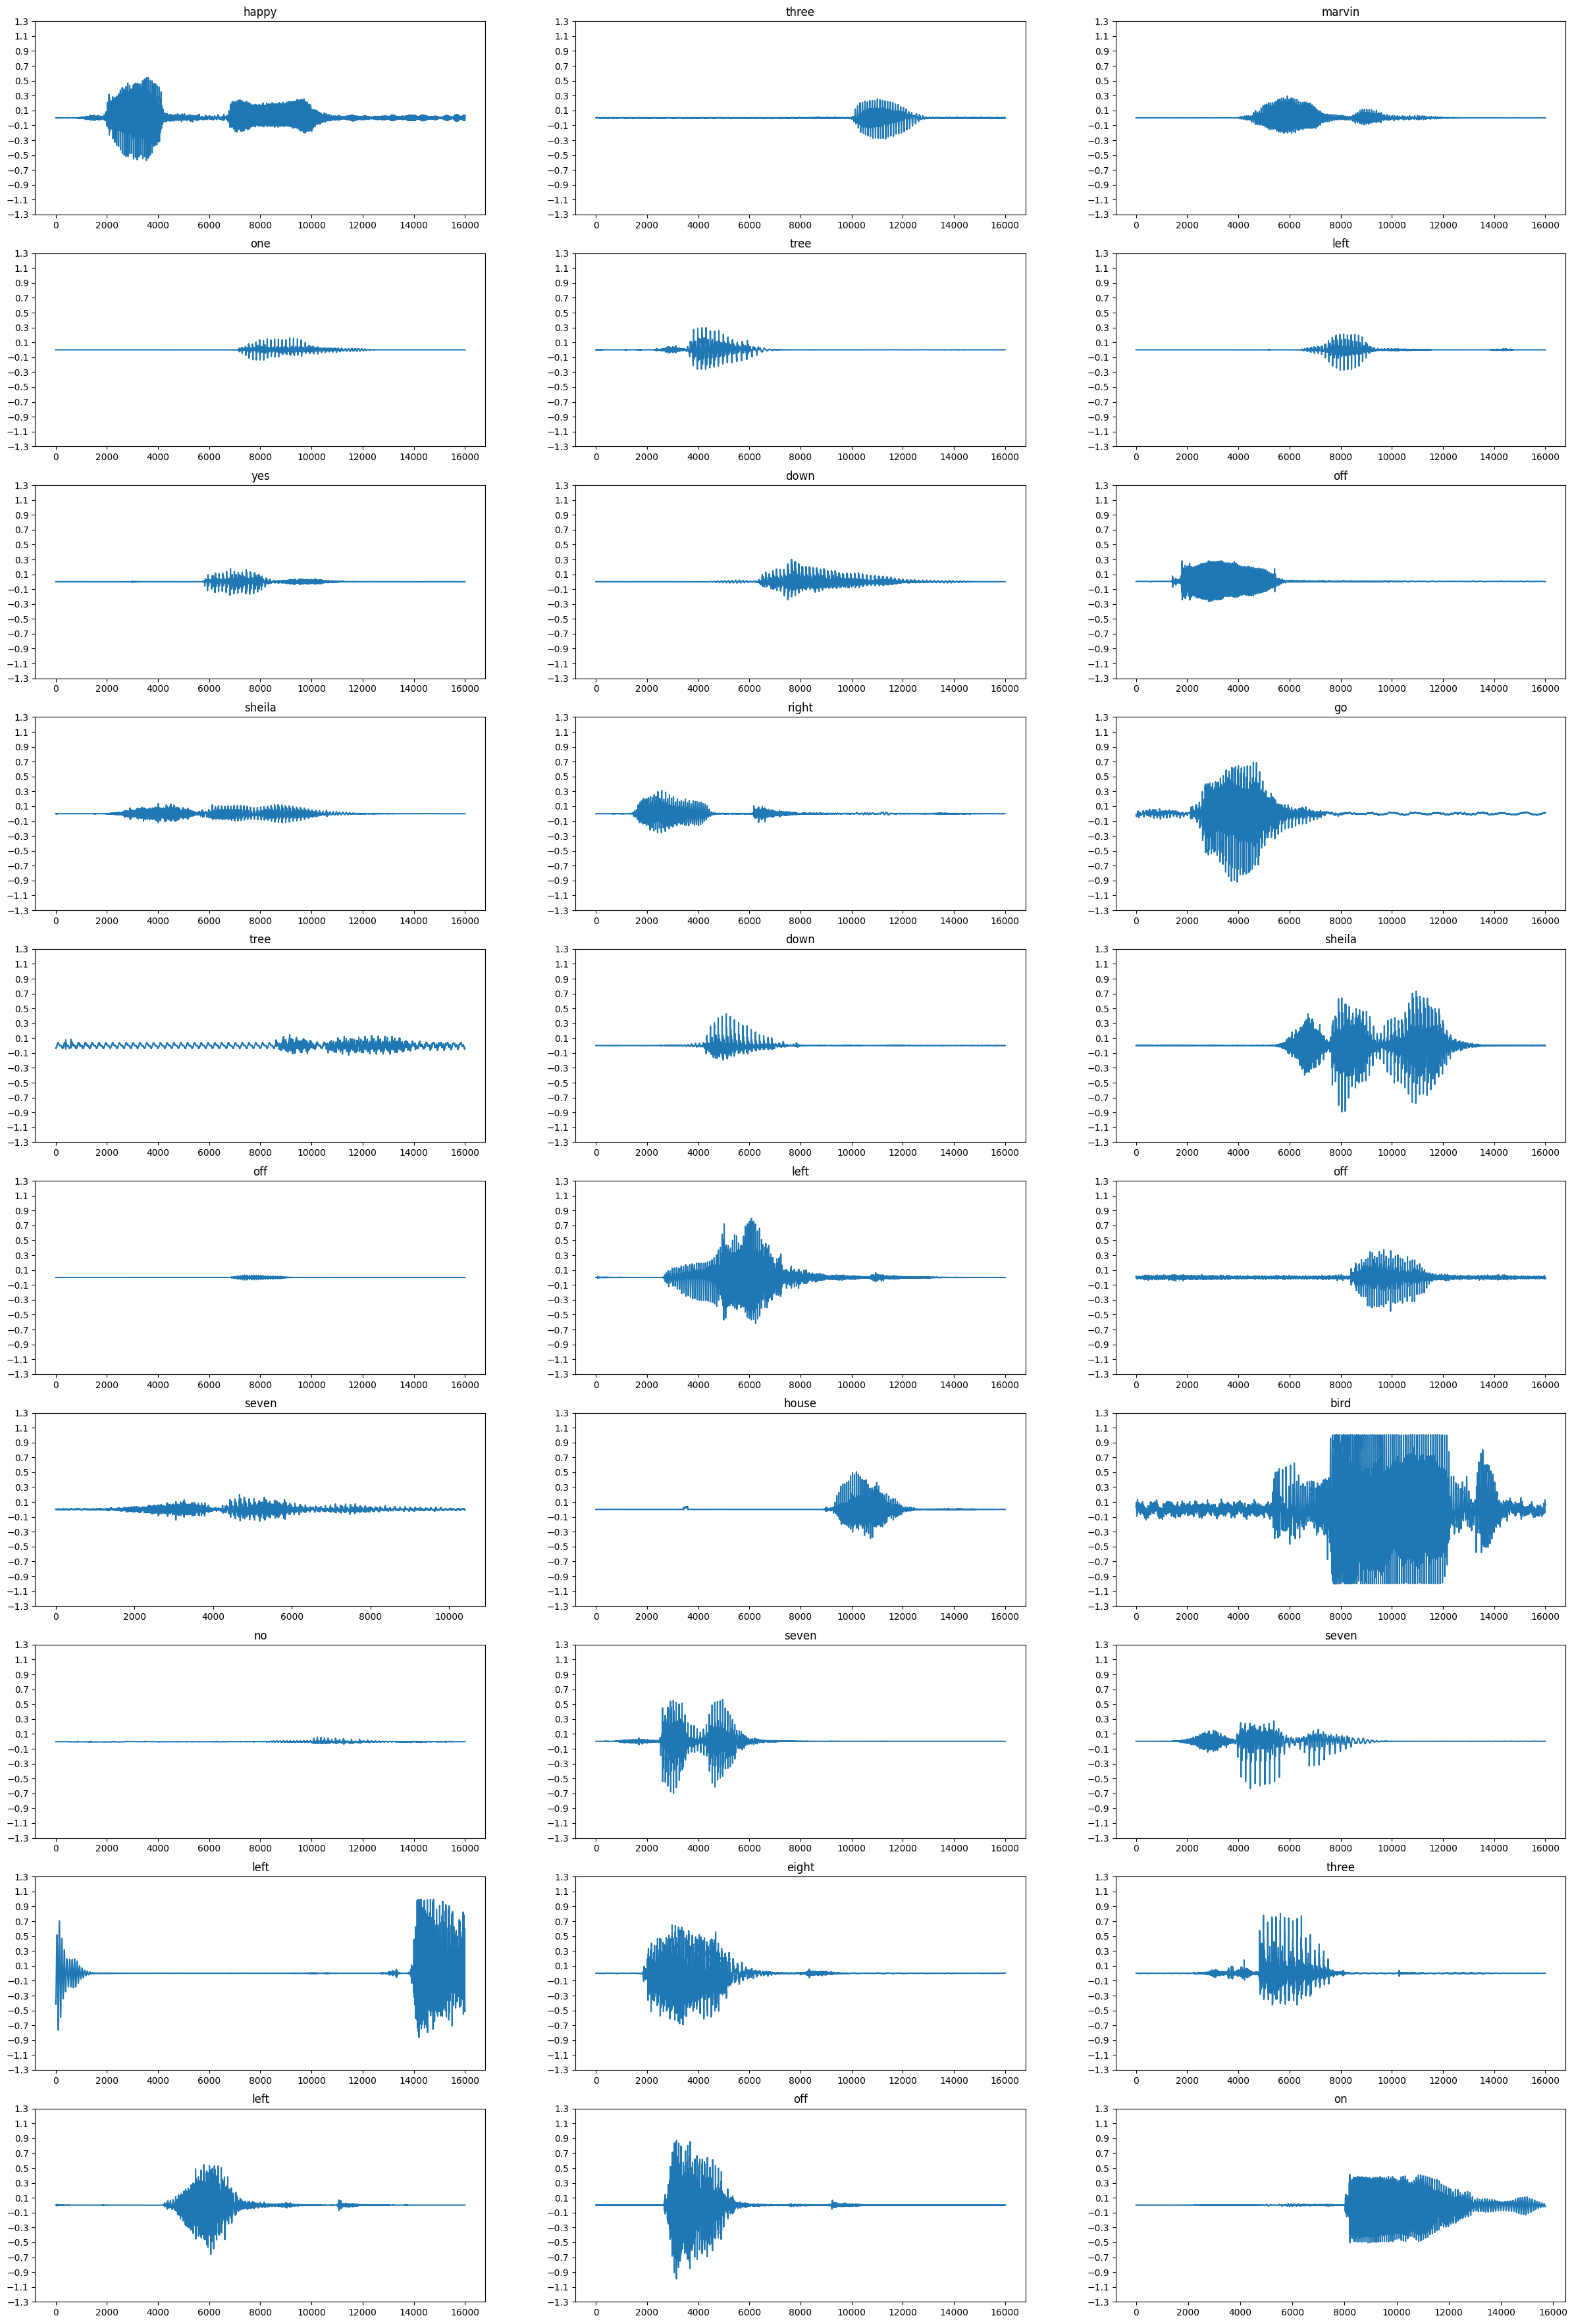

In [54]:
#codice per plottare i diversi input
rows = 10
cols = 3

n = rows * cols

fig,axes = plt.subplots(rows, cols, figsize=(30,45))


for i, (audio, label) in enumerate (wave_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.3, 1.5, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()